# CROCUS ADM Sonic Data Analysis

This notebook demonstrates how to download Sonic 3D Anemometer data from the Sage Data Client, check variable names, and plot time series and histograms of temperature and winds during CROCUS Intensive Observation Period (IOP).


In [1]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd

# from matplotlib.dates import DateFormatter

For quick data retrieval, limit the data download to a few minutes of high-frequency (20Hz) data.

In [3]:
df = sage_data_client.query(start="2024-07-27T10:00:00Z",
                            end="2024-07-27T11:00:00Z",
                            filter={
                                "vsn": "W09E",
                                "plugin": '10.31.81.1:5000/local/plugin-metek-sonic3d-sampler'
                            }
)
df.head()

,timestamp,name,value,meta.description,meta.host,meta.job,meta.missing,meta.name,meta.node,meta.plugin,meta.sensor,meta.task,meta.units,meta.vsn,meta.zone
0,2024-07-27 10:00:00.005522860+00:00,sonic3d.temp,21.273,Ambient Temperature,0000d83add0dbd5b.ws-rpi,Pluginctl,-9999.0,sonic3d.temp,000048b02dd3c454,10.31.81.1:5000/local/plugin-metek-sonic3d-sam...,METEK-sonic3D,sonic,degrees Celsius,W09E,shield
1,2024-07-27 10:00:00.039200241+00:00,sonic3d.temp,21.257,Ambient Temperature,0000d83add0dbd5b.ws-rpi,Pluginctl,-9999.0,sonic3d.temp,000048b02dd3c454,10.31.81.1:5000/local/plugin-metek-sonic3d-sam...,METEK-sonic3D,sonic,degrees Celsius,W09E,shield
2,2024-07-27 10:00:00.072460166+00:00,sonic3d.temp,21.247,Ambient Temperature,0000d83add0dbd5b.ws-rpi,Pluginctl,-9999.0,sonic3d.temp,000048b02dd3c454,10.31.81.1:5000/local/plugin-metek-sonic3d-sam...,METEK-sonic3D,sonic,degrees Celsius,W09E,shield
3,2024-07-27 10:00:00.105594316+00:00,sonic3d.temp,21.239,Ambient Temperature,0000d83add0dbd5b.ws-rpi,Pluginctl,-9999.0,sonic3d.temp,000048b02dd3c454,10.31.81.1:5000/local/plugin-metek-sonic3d-sam...,METEK-sonic3D,sonic,degrees Celsius,W09E,shield
4,2024-07-27 10:00:00.138973869+00:00,sonic3d.temp,21.240,Ambient Temperature,0000d83add0dbd5b.ws-rpi,Pluginctl,-9999.0,sonic3d.temp,000048b02dd3c454,10.31.81.1:5000/local/plugin-metek-sonic3d-sam...,METEK-sonic3D,sonic,degrees Celsius,W09E,shield


Here I want to check the variable names

In [12]:
df.name.unique()

array(['sonic3d.temp', 'sonic3d.uwind', 'sonic3d.vwind', 'sonic3d.wwind'],
      dtype=object)

Let's `groupby` and plot to check that the data exists for the period and it looks good.

name
sonic3d.temp     Axes(0.125,0.2;0.775x0.68)
sonic3d.uwind    Axes(0.125,0.2;0.775x0.68)
sonic3d.vwind    Axes(0.125,0.2;0.775x0.68)
sonic3d.wwind    Axes(0.125,0.2;0.775x0.68)
dtype: object

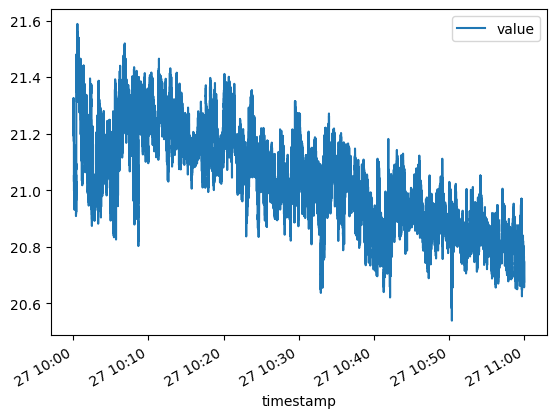

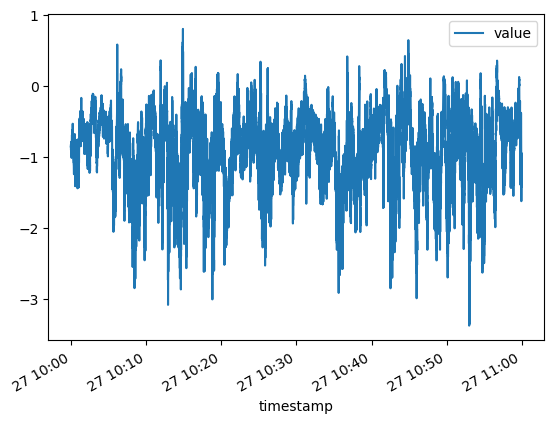

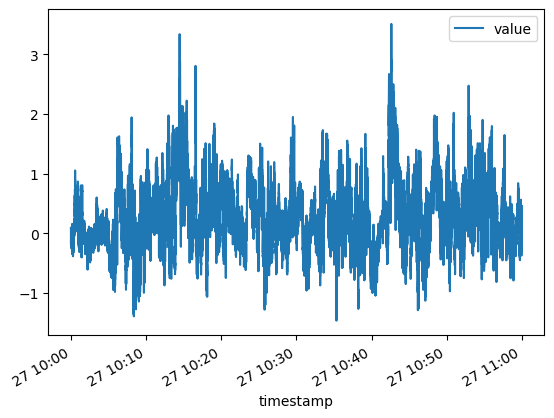

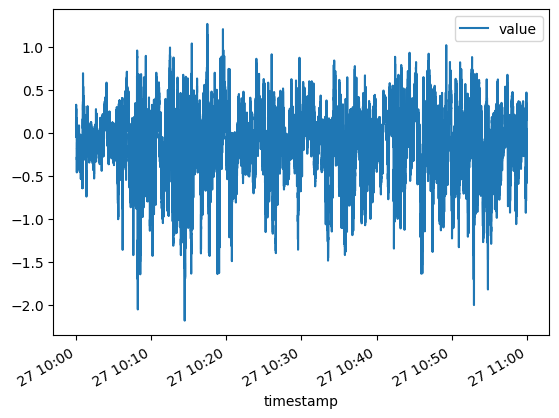

In [8]:
df.groupby('name').plot(x='timestamp', y='value', legend=True)

Filter data for temperature and wind components for ease of use


In [ ]:
df_temp = df[df['name'] == 'sonic3d.temp']
df_wind_u = df[df['name'] == 'sonic3d.uwind']
df_wind_v = df[df['name'] == 'sonic3d.vwind']
df_wind_w = df[df['name'] == 'sonic3d.wwind']

## frequency distribution of the data.

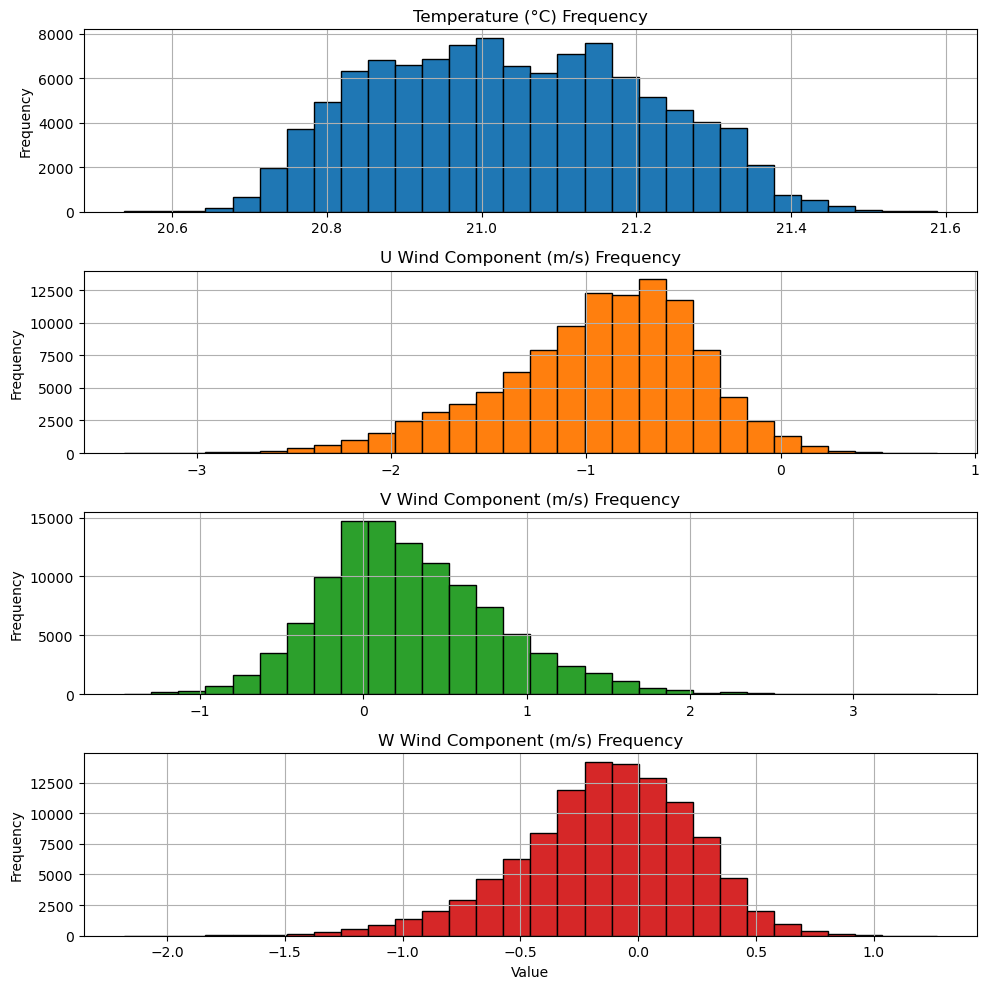

In [ ]:
# Create a panel plot 
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=False)

# Plot histogram for temperature
axs[0].hist(df_temp['value'], bins=30, color='tab:blue', edgecolor='black')
axs[0].set_title('Temperature (°C) Frequency')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

# Plot histogram for u
axs[1].hist(df_wind_u['value'], bins=30, color='tab:orange', edgecolor='black')
axs[1].set_title('U Wind Component (m/s) Frequency')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

# Plot histogram for v 
axs[2].hist(df_wind_v['value'], bins=30, color='tab:green', edgecolor='black')
axs[2].set_title('V Wind Component (m/s) Frequency')
axs[2].set_ylabel('Frequency')
axs[2].grid(True)

# Plot histogram for w 
axs[3].hist(df_wind_w['value'], bins=30, color='tab:red', edgecolor='black')
axs[3].set_title('W Wind Component (m/s) Frequency')
axs[3].set_ylabel('Frequency')
axs[3].set_xlabel('Value')
axs[3].grid(True)

plt.tight_layout()

plt.show()


# time series plots for temperature and wind 

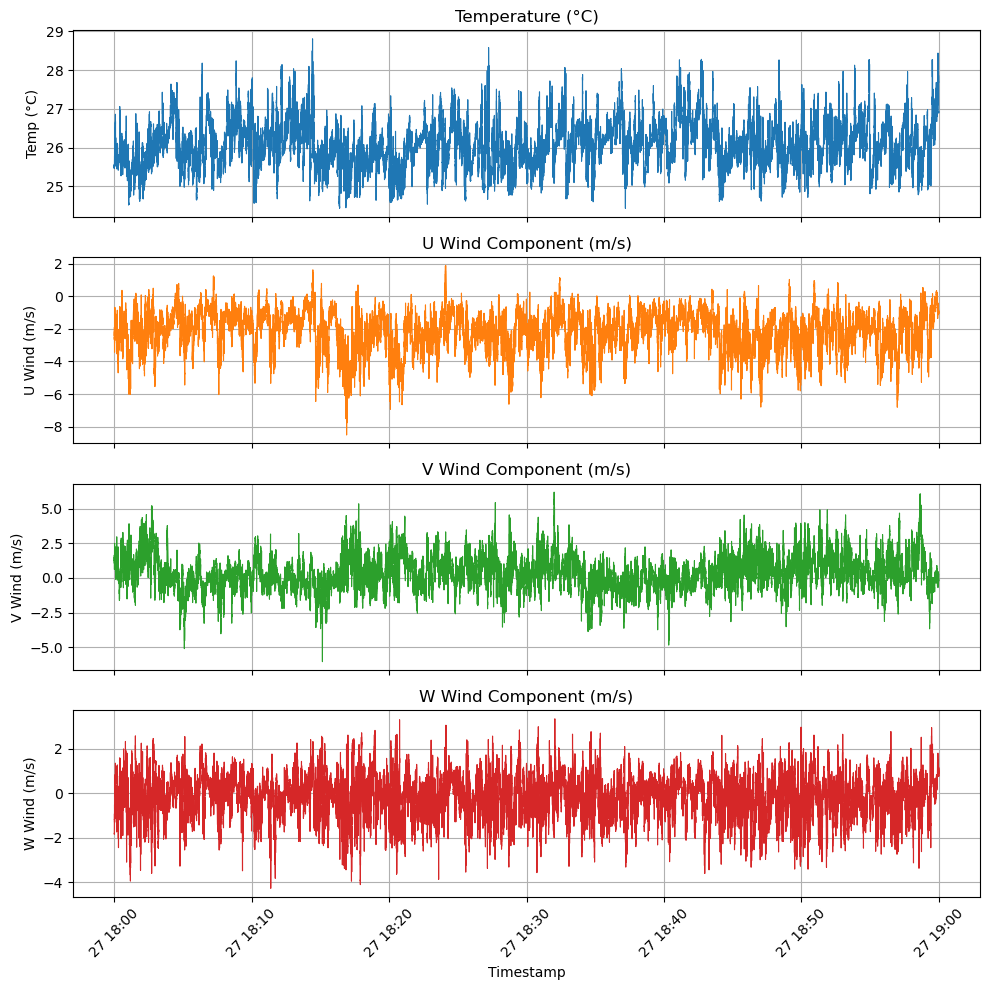

In [31]:
# Create a panel plot 
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

# Plot temperature
axs[0].plot(pd.to_datetime(df_temp['timestamp']), df_temp['value'], color='tab:blue', linewidth=0.8)
axs[0].set_title('Temperature (°C)')
axs[0].set_ylabel('Temp (°C)')
axs[0].grid(True)

# Plot u 
axs[1].plot(pd.to_datetime(df_wind_u['timestamp']), df_wind_u['value'], color='tab:orange', linewidth=0.8)
axs[1].set_title('U Wind Component (m/s)')
axs[1].set_ylabel('U Wind (m/s)')
axs[1].grid(True)

# Plot v 
axs[2].plot(pd.to_datetime(df_wind_v['timestamp']), df_wind_v['value'], color='tab:green', linewidth=0.8)
axs[2].set_title('V Wind Component (m/s)')
axs[2].set_ylabel('V Wind (m/s)')
axs[2].grid(True)

# Plot w 
axs[3].plot(pd.to_datetime(df_wind_w['timestamp']), df_wind_w['value'], color='tab:red', linewidth=0.8)
axs[3].set_title('W Wind Component (m/s)')
axs[3].set_ylabel('W Wind (m/s)')
axs[3].set_xlabel('Timestamp')
axs[3].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()